In [1]:
#############################################################################
####################Import all packages######################################
#############################################################################
import os
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling as pp
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'
# Set working directory
#############################################################################
# Make Jupyter Notebook show ALL output of a cell, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
def read_all_csvs_in_folder(path):
    ''' Function reading in all CSV files in a given folder.
        1. First lists all files in folder.
        2. Then reads in only files which are NOT of file size = 0 and contain headers + AT LEAST 1 row of data
        3. Appends all files into a final dataframe
        4. Also prints the amount of files in the folder, and the amount of files used for the final dataframe.
    '''
    import pandas as pd
    import glob
    import os
    # Create list containing all files names of the current folder
    all_files = glob.glob(path + "/*.csv")
    # These empty lists will be filled with:
    # 1. the names of the CSV files we want to append/merge, 
    # 2. 2 lists containing numbers representing all the files that were empty (or headers but no row data) and not read
    
    list_with_dfs = []
    zero_files = []
    empty_files = []
    empty_row_files = []
    filename_list = []
    n_files_appended = 0
    
    print('')
    print('')
    print('#####################################################')
    print('STARTING READ IN')
    print('#####################################################')
    print('')
    
    for filename in all_files:        
        print('Reading current file:')
        print(filename)
        # Check whether the CSV file is larger than 0Bytes (if not, it has for sure no data and will break during read in)
        try:        
            if os.path.getsize(filename) == 0:
                zero_files.append(filename)                
                print('')
                print('------------------------------------------------------')
                print('!!! SKIPPING FILE: ' + filename)
                print('    REASON: FILE SIZE == 0')
                print('------------------------------------------------------')
                print('')
            if os.path.getsize(filename) > 0:
                df = pd.read_csv(filename, index_col=None, header=0)            
                if df.empty:
                    empty_row_files.append(filename)
                    print('')
                    print('------------------------------------------------------')
                    print('!!! SKIPPING FILE: ' + filename)
                    print('    REASON: FILE CONTAINS NO ROW DATA')
                    print('------------------------------------------------------')
                    print('')
                # Check whether the CSV is empty (this ALSO works when it DOES have headers, but no row data. This is important!)
                if not df.empty:
                    list_with_dfs.append(df)
                    n_files_appended = n_files_appended + 1
                    filename_list.append(filename)
        except pd.errors.EmptyDataError:
            print('')
            print('------------------------------------------------------')
            print('!!! SKIPPING FILE: ' + filename)
            print('    REASON: FILE ENTIRELY EMPTY WITHOUT HEADERS')
            print('------------------------------------------------------')
            print('')
            empty_files.append(filename)            
            pass
    
    # Merge all files in the file list
    frame = pd.concat(list_with_dfs, axis=0, ignore_index=True)
    print('')
    print('#####################################################')
    print('!!! DONE READING & MERGING DATA !!!')
    print('#####################################################')
    print('')
    print('------------------------------------------------------')
    print('All files: ' + str(len(all_files)))    
    print('')
    print('Successfully appended files: ' + str(n_files_appended))
    print('------------------------------------------------------')
    print('------------------------------------------------------')
    print('')
    print('Empty files without headers: ' + str(len(empty_files)))
    #print(len(empty_files))
    print(empty_files)
    print('')
    print('Zero size files: ' + str(len(zero_files)))
    #print(len(zero_files))
    print(zero_files)
    print('')
    print('Empty row files: ' + str(len(empty_row_files)))
    #print(len(empty_row_files))
    print(empty_row_files)
    print('')    
    print('#####################################################')
    
    return frame    

In [1]:
# Read in files and merge them

#PreFlight & Flight
#path_pre_and_flight = r'../data/experiment/raw/exp_raw_pre_and_flight/' 
#pre_and_flight = read_all_csvs_in_folder(path_pre_and_flight)

# PostFlight
#path_postflight = r'../data/experiment/raw/exp_raw_postflight/postflightdata/postflight_data/' 
#postflight = read_all_csvs_in_folder(path_postflight)

# Extra Flight
#path_extra = r'../data/experiment/raw/exp_raw_extra/2019-04-12(1)/2019-04-12/' 
#extra = read_all_csvs_in_folder(path_extra)




In [20]:
pre_and_flight.shape
pre_and_flight.head()
pre_and_flight.tail()

(721, 70)

,timeStamp,Exp0_OxygenTemp,Exp0_Oxygendphi,Exp0_OxygenpercentO2,Exp0_OxygensingelIntensity,Exp0_OxygenAmbientLight,Exp0_PhValue,Exp0_PresensO2value,Exp0_PH calTemp,Exp0_PH Ref Amplitude,Exp0_PH Amplitude,Exp0_PH Phase shift,Exp0_PH calibration Pressure,Exp0_Presens 02 Ref Amp,Exp0_Presens 02 Amp,Exp0_Presens 02 Phase,Exp0_Presens 02 cal Temp,Exp0_Presens errorcode,Exp0_TempPump,Exp0_TempCamera,Exp1_OxygenTemp,Exp1_Oxygendphi,Exp1_OxygenpercentO2,Exp1_OxygensingelIntensity,Exp1_OxygenAmbientLight,Exp1_PhValue,Exp1_PresensO2value,Exp1_PH calTemp,Exp1_PH Ref Amplitude,Exp1_PH Amplitude,Exp1_PH Phase shift,Exp1_PH calibration Pressure,Exp1_Presens 02 Ref Amp,Exp1_Presens 02 Amp,Exp1_Presens 02 Phase,Exp1_Presens 02 cal Temp,Exp1_Presens errorcode,Exp1_TempPump,Exp1_TempCamera,Temp_airHighPresision,Temp_Heater,Pressure_Electronics,Pressure_LateAccess,Imu_gyroX,Imu_gyroY,Imu_gyroZ,Imu_accelegrationX,Imu_accelegrationY,Imu_accelegrationZ,Imu_orientationX,Imu_orientationY,Imu_orientationZ,36V current,36V voltage,12V current,12V voltage,5V current,5V voltage,3V current,3V voltage,ssd current,ssd voltage,pump0 current,pump0 voltage,pump1 current,pump1 voltage,flowCellLed0 current,flowCellLed0 voltage,flowCellLed1 current,flowCellLed1 voltage
0,1552293621,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29750,19464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29687,30625,29768,29750,9599,9951,-35,-33,-47,-3874,-67,-33,0,0,0,160,27803,112,12047,303,5020,363,3307,50,3297,0,0,0,0,0,0,0,0
1,1552293626,29594,31244,11472,16611,64821,0,0,0,0,0,0,0,0,0,0,0,0,29750,29750,30119,29280,13582,33417,65155,0,0,0,0,0,0,0,0,0,0,0,0,29687,30625,29779,29750,9597,9952,-28,-28,-45,-3906,-54,-54,0,0,0,360,27212,467,12036,424,5017,363,3307,50,3297,0,1,0,0,95,6,232,16
2,1552293631,29615,31276,8215,16631,64881,7100,2723835,0,0,0,0,0,0,0,0,0,0,29812,29750,30124,29267,9744,33409,65210,0,0,0,0,0,0,0,0,0,0,0,0,29687,30625,29779,29750,9597,9952,-35,-28,-49,-3898,-54,-57,0,0,0,400,27166,483,12035,545,5021,363,3307,50,3297,0,1,0,1,95,6,232,17
3,1552293636,29610,31287,8207,16643,64962,7099,2720247,0,0,0,0,0,0,0,0,0,0,29812,29750,30129,29285,9729,33406,65216,0,0,0,0,0,0,0,0,0,0,0,0,29687,30625,29768,29812,9596,9952,-37,-25,-53,-3889,-53,-21,0,0,0,400,27173,483,12033,424,5017,681,3303,350,3273,0,1,0,0,95,6,232,16
4,1552293641,29615,31283,8210,16651,64857,7099,2720576,0,0,0,0,0,0,0,0,0,0,29812,29812,30129,29277,9736,33433,65190,0,0,0,0,0,0,0,0,0,0,0,0,29750,30625,29747,29812,9599,9952,-31,-26,-48,-3893,-75,-37,0,0,0,360,27197,483,12031,272,5015,636,3305,350,3275,0,0,0,1,95,7,232,17


,timeStamp,Exp0_OxygenTemp,Exp0_Oxygendphi,Exp0_OxygenpercentO2,Exp0_OxygensingelIntensity,Exp0_OxygenAmbientLight,Exp0_PhValue,Exp0_PresensO2value,Exp0_PH calTemp,Exp0_PH Ref Amplitude,Exp0_PH Amplitude,Exp0_PH Phase shift,Exp0_PH calibration Pressure,Exp0_Presens 02 Ref Amp,Exp0_Presens 02 Amp,Exp0_Presens 02 Phase,Exp0_Presens 02 cal Temp,Exp0_Presens errorcode,Exp0_TempPump,Exp0_TempCamera,Exp1_OxygenTemp,Exp1_Oxygendphi,Exp1_OxygenpercentO2,Exp1_OxygensingelIntensity,Exp1_OxygenAmbientLight,Exp1_PhValue,Exp1_PresensO2value,Exp1_PH calTemp,Exp1_PH Ref Amplitude,Exp1_PH Amplitude,Exp1_PH Phase shift,Exp1_PH calibration Pressure,Exp1_Presens 02 Ref Amp,Exp1_Presens 02 Amp,Exp1_Presens 02 Phase,Exp1_Presens 02 cal Temp,Exp1_Presens errorcode,Exp1_TempPump,Exp1_TempCamera,Temp_airHighPresision,Temp_Heater,Pressure_Electronics,Pressure_LateAccess,Imu_gyroX,Imu_gyroY,Imu_gyroZ,Imu_accelegrationX,Imu_accelegrationY,Imu_accelegrationZ,Imu_orientationX,Imu_orientationY,Imu_orientationZ,36V current,36V voltage,12V current,12V voltage,5V current,5V voltage,3V current,3V voltage,ssd current,ssd voltage,pump0 current,pump0 voltage,pump1 current,pump1 voltage,flowCellLed0 current,flowCellLed0 voltage,flowCellLed1 current,flowCellLed1 voltage
716,1552296385,33249,31282,7928,16255,64940,7120,7597098,0,0,0,0,0,0,0,0,0,0,32750,33812,30558,33535,6698,54555,65242,0,0,0,0,0,0,0,0,0,0,0,0,36687,35687,30185,34125,6554,5419,-312,-163,-114,5108,114,-500,0,0,0,360,29858,500,11990,393,5018,409,3308,60,3297,0,1,0,1,95,6,232,16
717,1552296390,33251,31309,7908,16531,64805,7119,7593511,0,0,0,0,0,0,0,0,0,0,32750,33812,30548,33601,6658,54911,65141,0,0,0,0,0,0,0,0,0,0,0,0,36687,35750,30174,34125,6612,5420,-1326,-158,-157,6719,-1,-730,0,0,0,320,29857,467,11990,393,5020,363,3308,60,3297,0,0,0,1,95,6,232,17
718,1552296395,33259,31303,7912,16519,64779,7119,7562413,0,0,0,0,0,0,0,0,0,0,32812,33812,30548,33675,6614,55244,65156,0,0,0,0,0,0,0,0,0,0,0,0,36687,35687,30164,34125,6636,5420,-3602,-3,-169,4253,-71,-237,0,0,0,400,29838,483,11990,424,5023,681,3303,320,3276,0,0,0,1,95,7,232,17
719,1552296400,33306,31385,7855,16820,64831,7118,7524029,0,0,0,0,0,0,0,0,0,0,32812,33812,30542,33748,6571,55668,65335,0,0,0,0,0,0,0,0,0,0,0,0,36687,35750,30142,34125,6663,5422,6069,-412,-326,4406,353,48,0,0,0,360,29840,483,11990,303,5015,681,3306,310,3276,0,0,0,1,95,7,232,18
720,1552296406,33267,31411,7837,16956,64896,7118,7491211,0,0,0,0,0,0,0,0,0,0,32812,33812,30540,33902,6481,56442,65213,0,0,0,0,0,0,0,0,0,0,0,0,36687,35750,30121,34125,6694,5423,3030,-349,627,4256,368,-306,0,0,0,400,29826,467,11990,424,5017,818,3300,430,3256,0,0,0,1,95,6,232,16


In [21]:
postflight.shape
postflight.head()
postflight.tail()

(353583, 70)

,timeStamp,Exp0_OxygenTemp,Exp0_Oxygendphi,Exp0_OxygenpercentO2,Exp0_OxygensingelIntensity,Exp0_OxygenAmbientLight,Exp0_PhValue,Exp0_PresensO2value,Exp0_PH calTemp,Exp0_PH Ref Amplitude,Exp0_PH Amplitude,Exp0_PH Phase shift,Exp0_PH calibration Pressure,Exp0_Presens 02 Ref Amp,Exp0_Presens 02 Amp,Exp0_Presens 02 Phase,Exp0_Presens 02 cal Temp,Exp0_Presens errorcode,Exp0_TempPump,Exp0_TempCamera,Exp1_OxygenTemp,Exp1_Oxygendphi,Exp1_OxygenpercentO2,Exp1_OxygensingelIntensity,Exp1_OxygenAmbientLight,Exp1_PhValue,Exp1_PresensO2value,Exp1_PH calTemp,Exp1_PH Ref Amplitude,Exp1_PH Amplitude,Exp1_PH Phase shift,Exp1_PH calibration Pressure,Exp1_Presens 02 Ref Amp,Exp1_Presens 02 Amp,Exp1_Presens 02 Phase,Exp1_Presens 02 cal Temp,Exp1_Presens errorcode,Exp1_TempPump,Exp1_TempCamera,Temp_airHighPresision,Temp_Heater,Pressure_Electronics,Pressure_LateAccess,Imu_gyroX,Imu_gyroY,Imu_gyroZ,Imu_accelegrationX,Imu_accelegrationY,Imu_accelegrationZ,Imu_orientationX,Imu_orientationY,Imu_orientationZ,36V current,36V voltage,12V current,12V voltage,5V current,5V voltage,3V current,3V voltage,ssd current,ssd voltage,pump0 current,pump0 voltage,pump1 current,pump1 voltage,flowCellLed0 current,flowCellLed0 voltage,flowCellLed1 current,flowCellLed1 voltage
0,1554378176,20119.0,20898.0,18805.0,55425.0,65038.0,6726.0,8808485.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,19812.0,20729.0,28193.0,11668.0,51718.0,64972.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,20937.0,19670.0,19875.0,9930.0,9929.0,-128.0,51.0,42.0,194.0,-86.0,3688.0,0.0,0.0,0.0,200.0,23855.0,145.0,12020.0,303.0,4992.0,363.0,3313.0,50.0,3300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1554378181,20114.0,20914.0,18785.0,55542.0,65078.0,6726.0,8806800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,19812.0,20727.0,28200.0,11662.0,51738.0,65141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,20937.0,19681.0,19875.0,9928.0,9931.0,-126.0,50.0,45.0,199.0,-66.0,3612.0,0.0,0.0,0.0,200.0,23852.0,161.0,12021.0,303.0,5006.0,318.0,3315.0,50.0,3303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1554207924,20174.0,20858.0,18865.0,47145.0,64921.0,6731.0,7607684.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20187.0,19875.0,20667.0,28830.0,11068.0,54362.0,65033.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20187.0,21062.0,19745.0,20000.0,9991.0,9987.0,-127.0,23.0,41.0,184.0,-64.0,3675.0,0.0,0.0,0.0,240.0,23852.0,161.0,12020.0,272.0,5005.0,409.0,3313.0,50.0,3300.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1554207929,20187.0,20861.0,18858.0,47045.0,64970.0,6731.0,7608215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20125.0,19875.0,20670.0,28813.0,11083.0,54266.0,65147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20125.0,21000.0,19767.0,20000.0,9989.0,9989.0,-129.0,52.0,44.0,180.0,-53.0,3691.0,0.0,0.0,0.0,240.0,23851.0,161.0,12021.0,424.0,5001.0,318.0,3315.0,50.0,3302.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1553679109,19916.0,21160.0,18421.0,38304.0,65085.0,6736.0,5495274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20437.0,20375.0,20516.0,32303.0,8248.0,4271.0,65140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20250.0,21000.0,19681.0,20312.0,10233.0,10244.0,-128.0,50.0,44.0,175.0,-54.0,3591.0,0.0,0.0,0.0,240.0,23842.0,177.0,12020.0,333.0,5005.0,363.0,3313.0,50.0,3300.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


,timeStamp,Exp0_OxygenTemp,Exp0_Oxygendphi,Exp0_OxygenpercentO2,Exp0_OxygensingelIntensity,Exp0_OxygenAmbientLight,Exp0_PhValue,Exp0_PresensO2value,Exp0_PH calTemp,Exp0_PH Ref Amplitude,Exp0_PH Amplitude,Exp0_PH Phase shift,Exp0_PH calibration Pressure,Exp0_Presens 02 Ref Amp,Exp0_Presens 02 Amp,Exp0_Presens 02 Phase,Exp0_Presens 02 cal Temp,Exp0_Presens errorcode,Exp0_TempPump,Exp0_TempCamera,Exp1_OxygenTemp,Exp1_Oxygendphi,Exp1_OxygenpercentO2,Exp1_OxygensingelIntensity,Exp1_OxygenAmbientLight,Exp1_PhValue,Exp1_PresensO2value,Exp1_PH calTemp,Exp1_PH Ref Amplitude,Exp1_PH Amplitude,Exp1_PH Phase shift,Exp1_PH calibration Pressure,Exp1_Presens 02 Ref Amp,Exp1_Presens 02 Amp,Exp1_Presens 02 Phase,Exp1_Presens 02 cal Temp,Exp1_Presens errorcode,Exp1_TempPump,Exp1_TempCamera,Temp_airHighPresision,Temp_Heater,Pressure_Electronics,Pressure_LateAccess,Imu_gyroX,Imu_gyroY,Imu_gyroZ,Imu_accelegrationX,Imu_accelegrationY,Imu_accelegrationZ,Imu_orientationX,Imu_orientationY,Imu_orientationZ,36V current,36V voltage,12V current,12V voltage,5V current,5V voltage,3V current,3V voltage,ssd current,ssd voltage,pump0 current,pump0 voltage,pump1 current,pump1 voltage,flowCellLed0 current,flowCellLed0 voltage,flowCellLed1 current,flowCellLed1 voltage
353578,1554081216,20072.0,20611.0,19299.0,48390.0,65036.0,6734.0,7142823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20687.0,20687.0,20638.0,29362.0,10585.0,57170.0,65109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20500.0,21125.0,19799.0,20687.0,10197.0,10208.0,-131.0,53.0,40.0,143.0,-65.0,3652.0,0.0,0.0,0.0,280.0,23841.0,193.0,12018.0,424.0,5006.0,363.0,3313.0,50.0,3301.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
353579,1553601063,20127.0,21545.0,17774.0,40816.0,65019.0,6724.0,5088969.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20500.0,20375.0,20485.0,33524.0,7415.0,8876.0,65176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20312.0,21000.0,19703.0,20375.0,10187.0,10200.0,-126.0,57.0,44.0,142.0,-73.0,3683.0,0.0,0.0,0.0,240.0,23843.0,161.0,12022.0,363.0,5007.0,363.0,3315.0,50.0,3301.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
353580,1553601068,20129.0,21541.0,17779.0,40668.0,65084.0,6725.0,5090669.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20437.0,20312.0,20485.0,33519.0,7418.0,8828.0,65058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20312.0,21000.0,19692.0,20312.0,10191.0,10203.0,-127.0,51.0,43.0,195.0,-62.0,3670.0,0.0,0.0,0.0,200.0,23850.0,161.0,12021.0,303.0,5007.0,363.0,3315.0,50.0,3301.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
353581,1553274368,19909.0,22452.0,16475.0,3355.0,65070.0,6949.0,291231.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20312.0,20187.0,20425.0,50839.0,333.0,9286.0,65215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20125.0,20875.0,19596.0,20187.0,10192.0,10194.0,-132.0,51.0,44.0,126.0,-47.0,3670.0,0.0,0.0,0.0,280.0,23843.0,177.0,12021.0,303.0,5015.0,363.0,3313.0,50.0,3300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353582,1553274373,19914.0,22443.0,16487.0,3298.0,65072.0,6950.0,292475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20250.0,20187.0,20428.0,50855.0,329.0,9186.0,65154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20125.0,20875.0,19628.0,20187.0,10193.0,10197.0,-131.0,50.0,48.0,169.0,-36.0,3619.0,0.0,0.0,0.0,240.0,23845.0,193.0,12021.0,333.0,5011.0,318.0,3313.0,50.0,3301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Saving to disk
# In Pickle format for fast read in
#pre_and_flight.to_pickle('../data/experiment/merged/pre_and_flight_merged.pkl')
#postflight.to_pickle('../data/experiment/merged/postflight_merged.pkl')
#extra.to_pickle('../data/experiment/merged/extra_merged.pkl')
# In CSV
#pre_and_flight.to_csv('../data/experiment/merged/pre_and_flight_merged.csv')
#postflight.to_csv('../data/experiment/merged/postflight_merged.csv')
#extra.to_csv('../data/experiment/merged/extra_merged.csv')


In [ ]:
## Remove all unncessary columns
cols_to_keep = ['timeStamp',
                'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue',
                'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2',
                'Pressure_LateAccess']

pre_and_flight = pre_and_flight[cols_to_keep]
postflight = postflight[cols_to_keep]
#extra = extra[cols_to_keep]

In [31]:
# DFs contain negligible amount of missing values (NAs), just drop them
pre_and_flight.dropna(inplace=True)
postflight.dropna(inplace=True)
#extra.dropna(inplace=True)

In [24]:
def show_missingness(df):
    ''' Returns a simple dataframe showing missingness of all columns in percent.
        Input: DataFrame
        Output: DataFrame
    '''
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_value_df.sort_values('percent_missing', ascending=False)


def msno_cols_splitter(df, cols_to_display):
    '''
    Splits number of columns of a given dataframe in parts of N="cols_to_display".
    Necessary for function "msno_plot_cols".
    Never choose higher than 50 cols to display.
    Input:
        DataFrame
        Number of columns to display: Integer
    '''
    import numpy as np
    ncols = len(df.columns)
    nparts = int(np.ceil(ncols / cols_to_display))
    return np.array_split(range(ncols), nparts)

def msno_show_missingness(df, cols_to_display, plot_type='matrix'):
    '''
    Plots using function 'missingno' all columns in the dataframe 'df'.
    in steps of N='cols_to_display' columns. This function avoids overplotting of columns labels on the X-axis
    by only plotting the columns to display per plot.
    cols_to_display should NOT be larger than 50.
    Choose plot_type 'bar' of 'matrix' (default).
    For documentation of missingno see: https://github.com/ResidentMario/missingno
    
    '''
    import missingno as msno
    for columns in msno_cols_splitter(df, cols_to_display):                
        eval('msno.{}(df.iloc[:,columns])'.format(plot_type))

In [34]:
# Naive DateTime TimeStamp needs to be increased by 1hour (UTC+1 for Sweden) compared to what was recorded (apparently UTC, UK)
pre_and_flight.loc[:,'timeStamp'] = pd.to_datetime(pre_and_flight.timeStamp, unit='s').dt.tz_localize('UTC').dt.tz_convert('Europe/Stockholm')
postflight.loc[:,'timeStamp'] = pd.to_datetime(postflight.timeStamp, unit='s').dt.tz_localize('UTC').dt.tz_convert('Europe/Stockholm')
#extra.loc[:,'timeStamp'] = pd.to_datetime(extra.timeStamp, unit='s').dt.tz_localize('UTC').dt.tz_convert('Europe/Stockholm')


In [36]:
# Check the data range of the final timestamps
pre_and_flight.timeStamp.min()
pre_and_flight.timeStamp.max()
postflight.timeStamp.min()
postflight.timeStamp.max()
#extra.timeStamp.min()
#extra.timeStamp.max()


Timestamp('2019-03-11 07:45:58+0100', tz='Europe/Stockholm')

Timestamp('2019-03-11 10:38:48+0100', tz='Europe/Stockholm')

Timestamp('2019-03-15 10:47:26+0100', tz='Europe/Stockholm')

Timestamp('2019-04-11 15:01:16+0200', tz='Europe/Stockholm')

In [37]:
# Create different time epochs for convenient plotting & exploration
# Pre and Flight
pre_and_flight.loc[:, 'year'] = pre_and_flight.timeStamp.dt.year
pre_and_flight.loc[:, 'month'] = pre_and_flight.timeStamp.dt.month
pre_and_flight.loc[:, 'day'] = pre_and_flight.timeStamp.dt.day
pre_and_flight.loc[:, 'hour'] = pre_and_flight.timeStamp.dt.hour
pre_and_flight.loc[:, 'minute'] = pre_and_flight.timeStamp.dt.minute
pre_and_flight.loc[:, 'second'] = pre_and_flight.timeStamp.dt.second

# Postflight
postflight.loc[:, 'year'] = postflight.timeStamp.dt.year
postflight.loc[:, 'month'] = postflight.timeStamp.dt.month
postflight.loc[:, 'day'] = postflight.timeStamp.dt.day
postflight.loc[:, 'hour'] = postflight.timeStamp.dt.hour
postflight.loc[:, 'minute'] = postflight.timeStamp.dt.minute
postflight.loc[:, 'second'] = postflight.timeStamp.dt.second

# Extra
#extra.loc[:, 'year'] = extra.timeStamp.dt.year
#extra.loc[:, 'month'] = extra.timeStamp.dt.month
#extra.loc[:, 'day'] = extra.timeStamp.dt.day
#extra.loc[:, 'hour'] = extra.timeStamp.dt.hour
#extra.loc[:, 'minute'] = extra.timeStamp.dt.minute
#extra.loc[:, 'second'] = extra.timeStamp.dt.second

In [74]:
#Wichtige Zeitpunkte:
#- Ende Late Access (LA) 11.03.2019  07:45:58
end_late_access = pd.to_datetime('2019-03-11 07:45:58')
#- Lift-Off (LO) 11.03.2019  10:19:56  --- 11.03.2019 10:20:00 1552296000 Lift-Off (LO)
lift_off = pd.to_datetime('2019-03-11 10:20:00')
#- De-Spin (keine Rotierung der Rakete) ~ Nullbewegung in alle Richtungen im Video nach 1 min 7s 38 ms nach LO
de_spin = lift_off + pd.Timedelta('1 minutes 7 seconds')
#- Ende des Raketenantriebs (Motorabwurf, keine Beschleunigung, keine Hypergravitation) 1 min 10 s 20 ms nach LO
end_rocket_propulsion = lift_off + pd.Timedelta('1 minutes 10 seconds')
#- Apogee (Zeitpunkt zu dem die Rakete den höchsten Höhenmeter erreicht hat) 124,4 Sekunden nach LO (errreichte Höhe 82,184 km)
apogee = lift_off + pd.Timedelta('124 seconds')
#- Auswurf 1. Fallschirm ~ 5 min 55 s nach LO
parachute_1 = lift_off + pd.Timedelta('5 minutes 55 seconds')
#- Auswurf 2. Fallschirm ~ 6 min 20 s nach LO
parachute_2 = lift_off + pd.Timedelta('6 minutes 20 seconds')
#- Zeitpunkt der Landung 11.03.2019 10:33:41.800000
landing = pd.to_datetime('2019-03-11 10:33:41')


In [39]:
# Sort DF by timeStamp
pre_and_flight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
postflight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
#extra.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
# Make timestamp index of DF for easier plotting
#pre_and_flight.set_index('timeStamp', inplace=True)
#postflight.set_index('timeStamp', inplace=True)

In [40]:
# Scale columns values 

# Pre-and flight
pre_and_flight.loc[:,'Exp0_OxygenTemp'] = pre_and_flight.Exp0_OxygenTemp/1000
pre_and_flight.loc[:,'Exp1_OxygenTemp'] = pre_and_flight.Exp1_OxygenTemp/1000
pre_and_flight.loc[:,'Exp0_OxygenpercentO2'] = pre_and_flight.Exp0_OxygenpercentO2/1000
pre_and_flight.loc[:,'Exp1_OxygenpercentO2'] = pre_and_flight.Exp1_OxygenpercentO2/1000

# Postflight
postflight.loc[:,'Exp0_OxygenTemp'] = postflight.Exp0_OxygenTemp/1000
postflight.loc[:,'Exp1_OxygenTemp'] = postflight.Exp1_OxygenTemp/1000
postflight.loc[:,'Exp0_OxygenpercentO2'] = postflight.Exp0_OxygenpercentO2/1000
postflight.loc[:,'Exp1_OxygenpercentO2'] = postflight.Exp1_OxygenpercentO2/1000

# extra
#extra.loc[:,'Exp0_OxygenTemp'] = extra.Exp0_OxygenTemp/1000
#extra.loc[:,'Exp1_OxygenTemp'] = extra.Exp1_OxygenTemp/1000
#extra.loc[:,'Exp0_OxygenpercentO2'] = extra.Exp0_OxygenpercentO2/1000
#extra.loc[:,'Exp1_OxygenpercentO2'] = extra.Exp1_OxygenpercentO2/1000



In [2]:
# Pandas Profiling conveniently returns an extensive report with descriptive statistics for each DF
#pre_and_flight.profile_report(style={'full_width':True})
#postflight.profile_report(style={'full_width':True})

In [56]:
# Explore which year, days, hours and minutes were actually recorded
#plt.figure(figsize=(18, 6))
pre_and_flight.set_index('timeStamp', inplace=True)

,timeStamp,Exp0_OxygenTemp,Exp0_OxygenpercentO2,Exp0_PhValue,Exp1_OxygenTemp,Exp1_OxygenpercentO2,Pressure_LateAccess,year,month,day,hour,minute,second
314,2019-03-11 07:45:58+01:00,0.000,0.000,0,0.000,0.000,9826,2019,3,11,7,45,58
315,2019-03-11 07:46:03+01:00,20.929,10.791,0,21.418,6.347,9827,2019,3,11,7,46,3
316,2019-03-11 07:46:08+01:00,20.932,8.471,6873,21.425,4.887,9829,2019,3,11,7,46,8
317,2019-03-11 07:46:14+01:00,20.932,8.469,6872,21.428,4.893,9829,2019,3,11,7,46,14
318,2019-03-11 07:46:19+01:00,20.937,8.477,6872,21.436,4.881,9833,2019,3,11,7,46,19


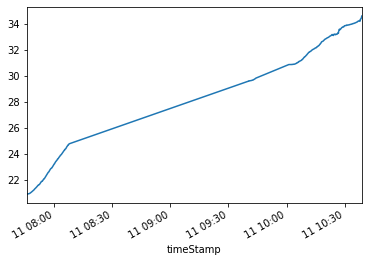

In [57]:
pre_and_flight[pre_and_flight.Exp0_OxygenTemp != 0].Exp0_OxygenTemp.plot()

/home/taco/anaconda3/lib/python3.6/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


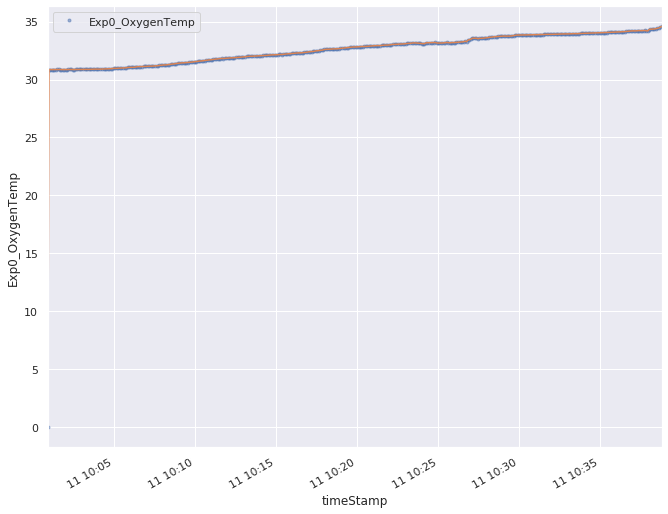

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
flight_start = pd.to_datetime('2019-03-11 10:00:00').tz_localize('Europe/Stockholm')
pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(data = pre_and_flight,
            x = pre_and_flight.index,
            y = pre_and_flight.Exp0_OxygenTemp
            )
test = pd.to_datetime('2019-03-11 10:05:00').tz_localize('Europe/Stockholm')
ax.axvline(x= test,
           color = 'r',
           linestyle = '--')



Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

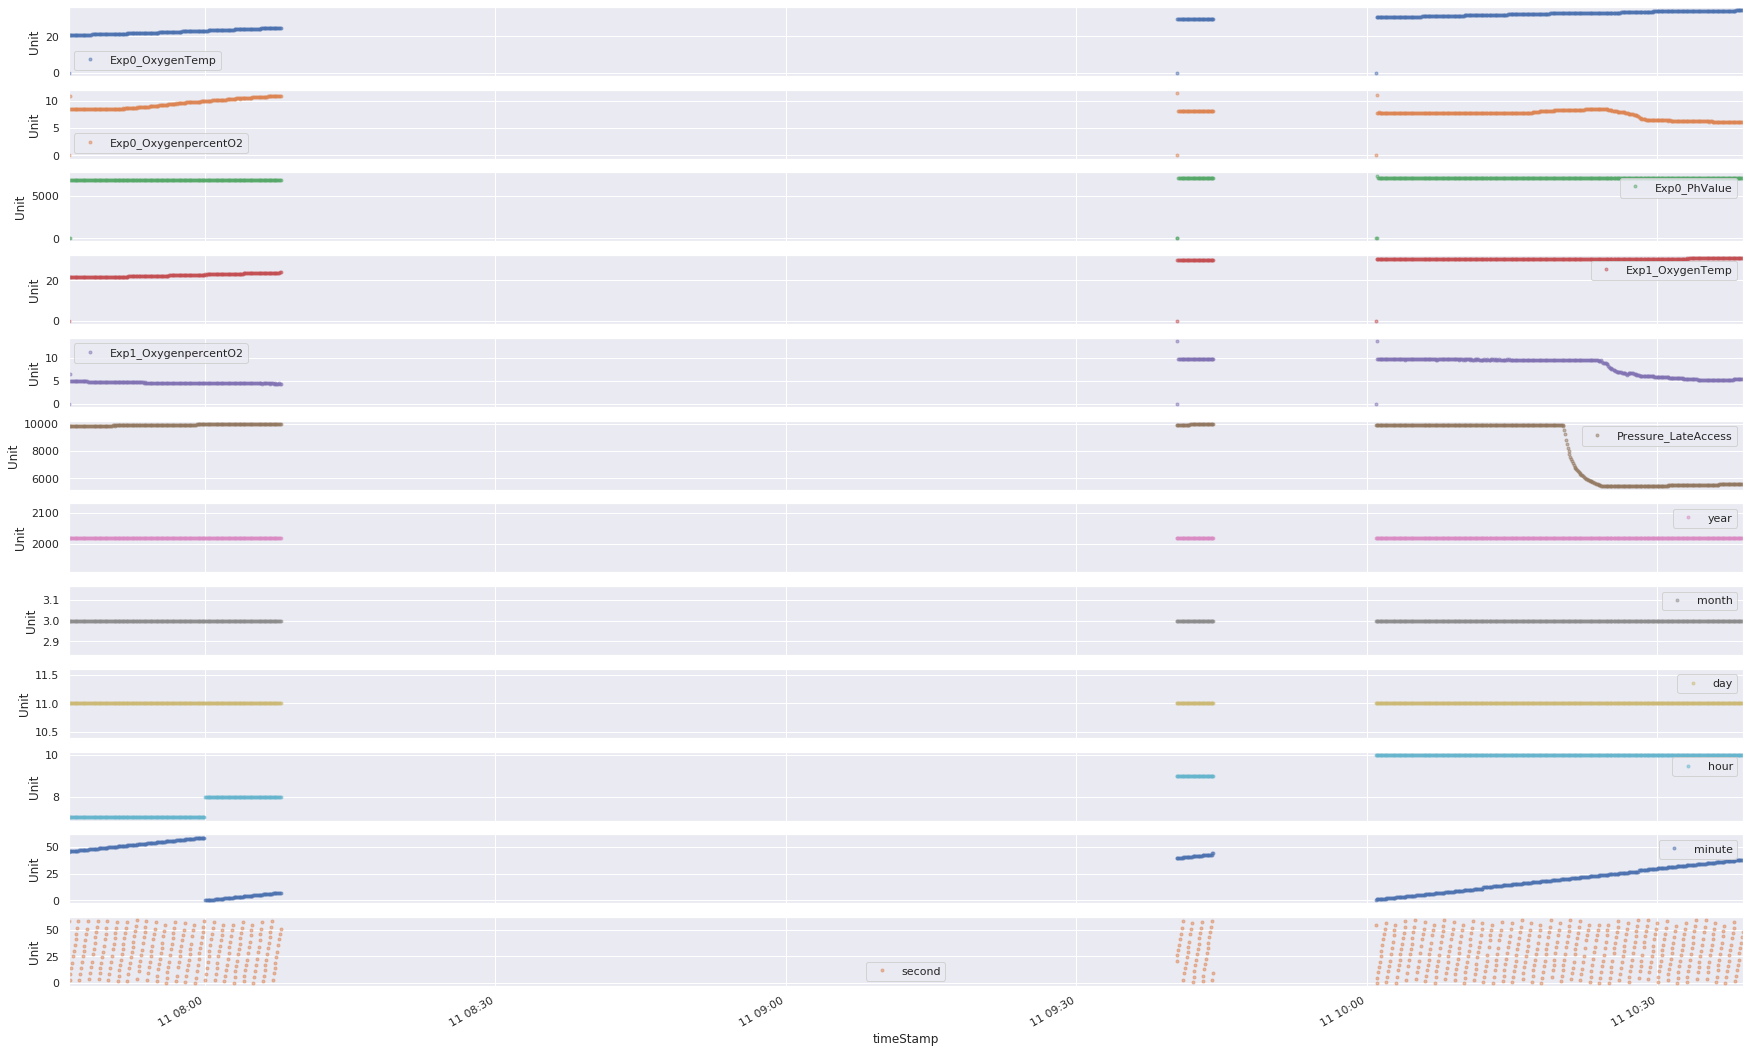

In [92]:
axes = pre_and_flight.plot(marker='.',
                           alpha=0.5,
                           linestyle='None',
                           figsize=(30, 20),
                           subplots=True)
for ax in axes:
    ax.set_ylabel('Unit')

In [115]:
postflight.groupby(['year', 'day', 'hour']).mean()

Exp0_OxygenTemp  Exp0_OxygenpercentO2  Exp0_PhValue  Exp1_OxygenTemp  Exp1_OxygenpercentO2  Pressure_LateAccess  month     minute     second
year day hour                                                                                                                                              
2019 1   0           20.066132             19.307932   6734.522727        20.670838          6.517950e+03         10213.271212    4.0  29.353030  29.451515
         1           20.118238             19.309292   6733.680787        20.737224          1.043265e+01         10211.464448    4.0  29.434191  29.255673
         2           20.123075             19.300976   6733.905983        20.709152          1.056608e+01         10210.803419    4.0  29.556980  29.522792
         3           20.133601             19.297655   6734.049716        20.704692          1.058652e+01         10209.889205    4.0  29.450284  29.444602
         4           20.183479             19.291278   6733.704965        20.735204          1.057417e+01         10208.173050    4.0  29.490780  29.316312
         5           20.149969             19.295451   6733.237624        20.721546          1.056212e+01         10205.268741    4.0  29.446959  29.742574
         6           20.140430             19.292016   6733.228369        20.720260          1.055449e+01         10204.978723    4.0  29.460993  29.656738
         7           20.129942             19.289413   6733.648148        20.682963          1.069179e+01         10206.810541    4.0  29.517094  29.558405
         8           20.062996             19.334962   6733.382646        20.673006          1.070225e+01         10209.059744    4.0  29.532006  29.500711
         9           19.963426             19.456950   6732.319661        20.595632          1.069296e+01         10209.042433    4.0  29.564356  29.400283
         10          19.733796             19.497984   6730.595745        20.417241          1.067383e+01         10206.187234    4.0  29.449645  29.195745
         11          19.836380             19.492546   6730.908962        20.467100          1.067593e+01         10201.452347    4.0  29.446657  29.462304
         12          19.912917             19.494506   6732.048091        20.510615          6.085722e+03         10195.340877    4.0  29.445545  29.441301
         13          19.929263             19.481537   6732.264205        20.571094          1.081453e+01         10187.830966    4.0  29.495739  29.470170
         14          19.937223             19.471118   6732.089362        20.580976          1.079879e+01         10177.567376    4.0  29.507801  29.478014
         15          19.978462             19.439853   6731.961756        20.581125          1.077821e+01         10165.219547    4.0  29.481586  29.322946
         16          19.969278             19.405237   6732.051064        20.611474          1.076005e+01         10152.855319    4.0  29.459574  29.536170
         17          19.949491             19.346383   6732.362731        20.599491          1.075166e+01         10143.877667    4.0  29.473684  29.539118
         18          19.936420             19.260401   6733.231534        20.596303          1.088521e+01         10135.600852    4.0  29.480114  29.673295
         19          19.966301             19.238325   6733.494302        20.618380          1.087450e+01         10133.245014    4.0  29.401709  29.631054
         20          19.956661             19.238318   6733.086158        20.565025          1.085901e+01         10131.362994    4.0  29.416667  29.354520
         21          20.023086             19.230137   6732.858006        20.653165          1.084864e+01         10130.345921    4.0  29.527190  29.507553
         22          20.013694             19.228804   6732.935143        20.660422          1.083762e+01         10124.098039    4.0  29.506787  29.582202
         23          20.020612             19.212388   6732.685888        20.648951          1.082128e+01         1

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

Text(0, 0.5, 'Unit')

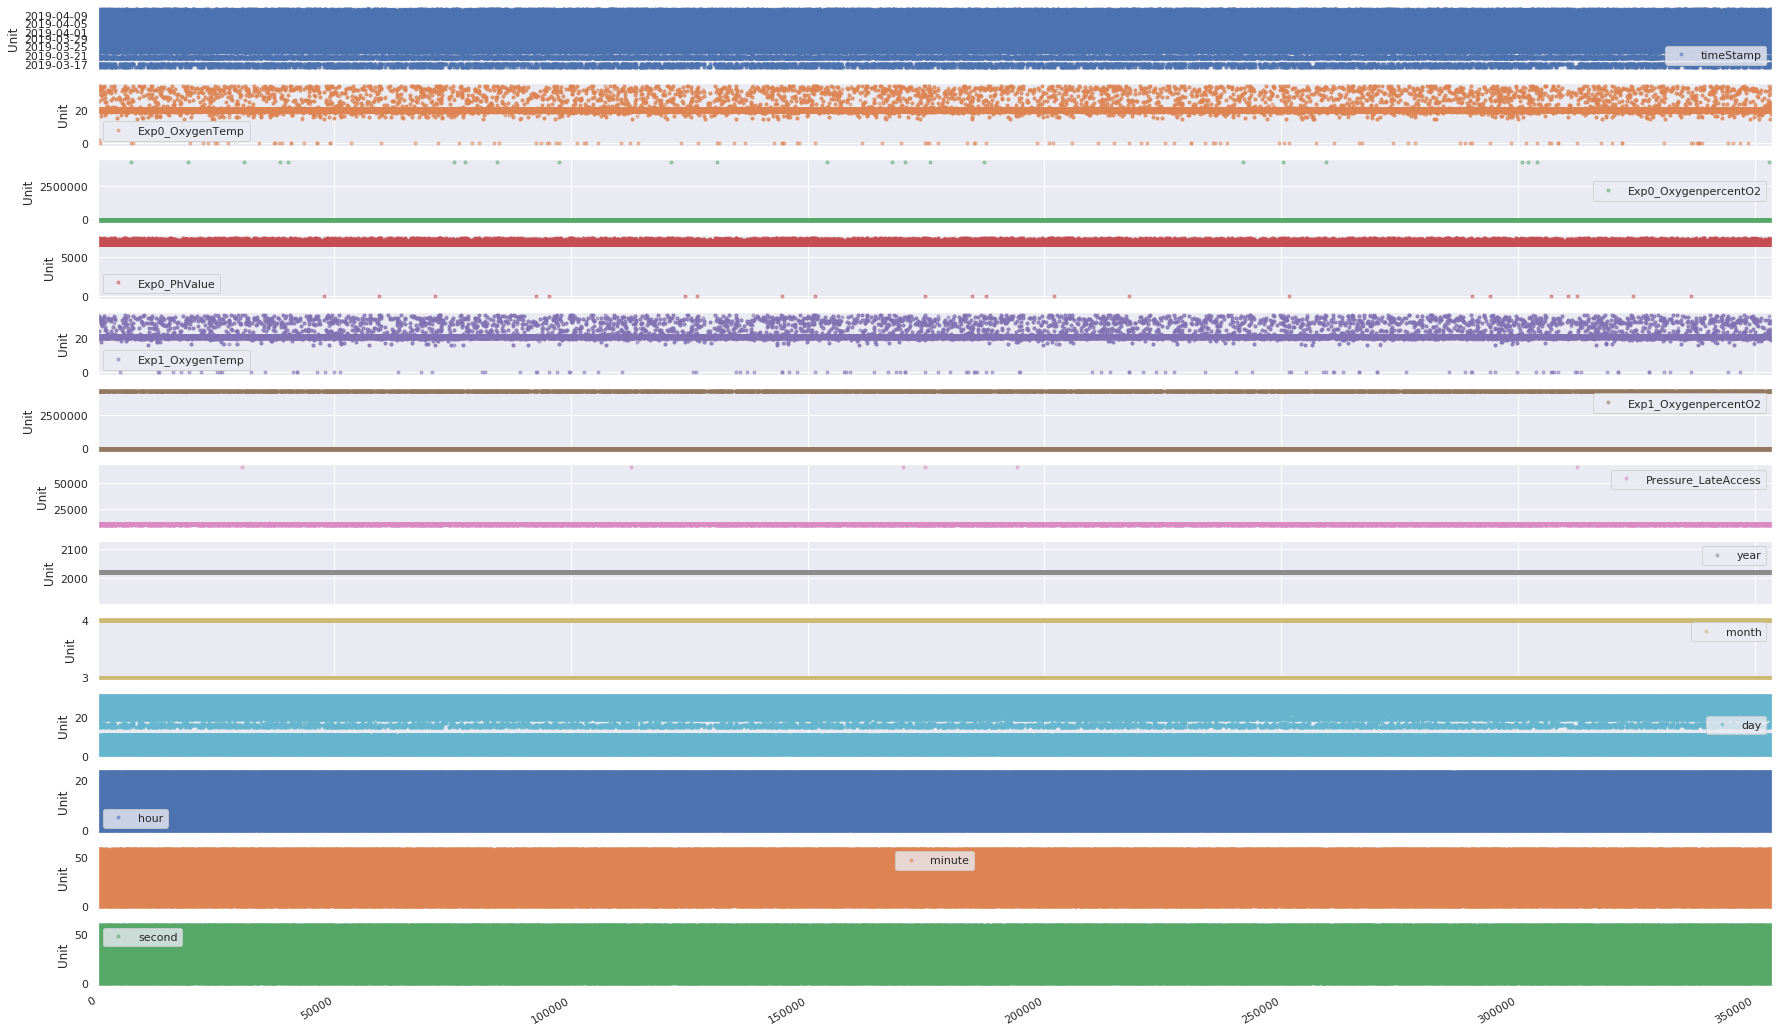

In [110]:
axes = postflight.plot(marker='.',
                           alpha=0.5,
                           linestyle='None',
                           figsize=(30, 20),
                           subplots=True)
for ax in axes:
    ax.set_ylabel('Unit')